# Preamble

In [3]:
import time
import collections
from numpy import *
import random as rand
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = "normal"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# Random $n$ cut cake generator

Theoretical Expectation: 300
Intersections: 236
Pieces: 277

Run time: 1.895517349243164 sec


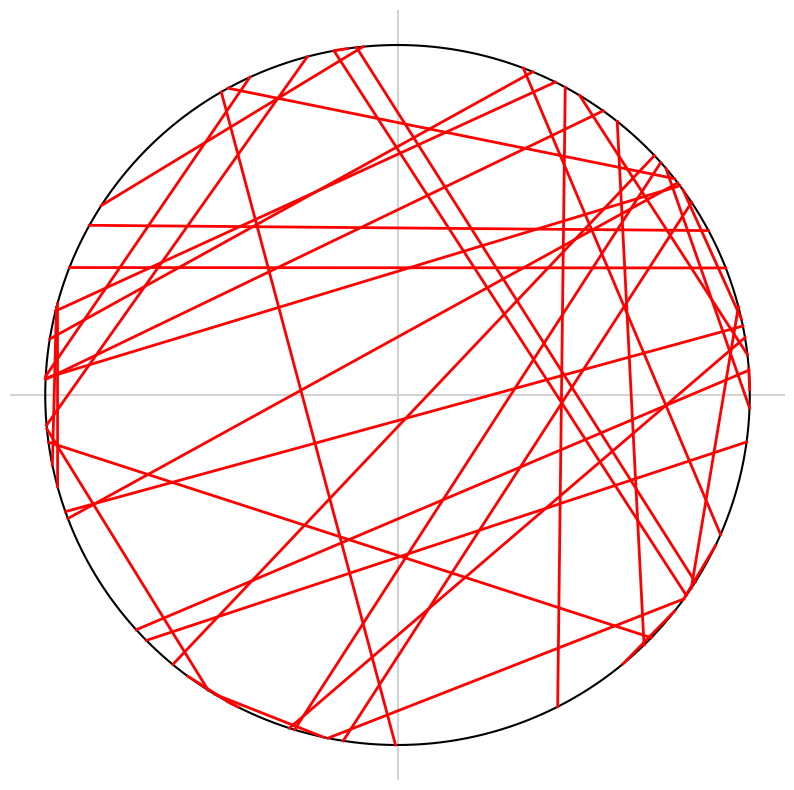

In [41]:
def draw_cuts(cake_pieces): # Function used to draw the cut given two points on the cake
    theta1, theta2 = cake_pieces.T[0], cake_pieces.T[1]
    plt.plot([cos(theta1 + pi/2), cos(theta2 + pi/2)], [sin(theta1 + pi/2), sin(theta2 + pi/2)], linewidth=2, color='red') # +pi/2 added so that theta=0 is along the y-axis
    

def draw_cake():
    theta = linspace(0, 2 * pi, int(1e6))
    plt.figure(figsize=(10, 10), dpi=100)
    plt.axis('off')
    plt.axvline(color='lightgray')
    plt.axhline(color='lightgray')
    plt.plot(sin(theta), cos(theta), "k")
    
    
def main(num_cuts):
    cake_pieces = array([list(sort([rand.uniform(0, 2 * pi), rand.uniform(0, 2 * pi)])) for i in range(num_cuts)])
    draw_cake()
    draw_cuts(cake_pieces)
    cake_pieces = [list(piece) for piece in cake_pieces]
    
    total_intersections = 0
    for i in range(num_cuts): #intersection counting by iterating over all cuts
        for j in range(num_cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)

    expectation = int((1/6) * num_cuts * num_cuts + (5/6) * num_cuts + 1) # Analytical expectation
    print(f"Theoretical Expectation: {expectation}")
    print(f"Intersections: {total_intersections}")
    print(f"Pieces: {total_intersections + num_cuts + 1}\n")


start = time.time()

main(num_cuts = 40)  # Change to the number of cuts you want

end = time.time()
print(f"Run time: {end - start} sec")

# Simulation for the expectation value $\langle P(n) \rangle$

<P(n)> = 0.16677128774042463n^2 + 0.8247381088928851n + 1.0851132982005782 

Run time: 726.803652048111 sec


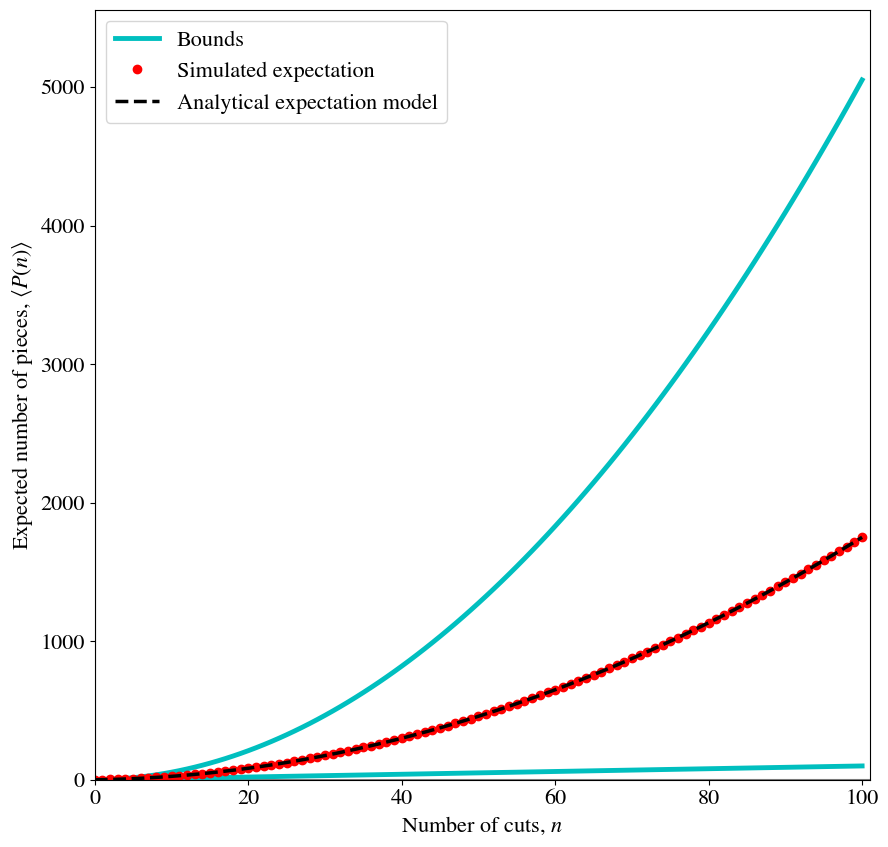

In [44]:
def count_pieces(num_cuts):
    cake_pieces = [list(sort([rand.uniform(0, 2 * pi), rand.uniform(0, 2 * pi)])) for i in range(num_cuts)] # create cuts using random choice
    total_intersections = 0 
    for i in range(num_cuts): #intersection counting by iterating over all cuts
        for j in range(num_cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)
    return total_intersections + num_cuts + 1


def main(num_cuts, num_loops):
    simulated_expectation = [mean([count_pieces(cut) for i in range(num_loops)]) for cut in range(num_cuts + 1)] # list of all expectations for cuts 1-100
    cut_range = linspace(0, num_cuts, num_cuts + 1)
    
    [a, b, c] = polyfit(cut_range, simulated_expectation, 2, cov=False)
    print(f"<P(n)> = {a}n^2 + {b}n + {c} \n")
    
    plt.figure(figsize=(10, 10), dpi=100)
    plt.axvline(color='gray')
    plt.axhline(color='gray')
    plt.xlim(- 0, max(cut_range) + 1)
    plt.ylim(- 0, 1.1 * max(0.5 * (cut_range * cut_range + cut_range + 2)))
    plt.xlabel(r'Number of cuts, $n$')
    plt.ylabel(r'Expected number of pieces, $\langle P(n) \rangle$')
    
    low_bound = cut_range + 1
    upp_bound = 0.5 * (cut_range * cut_range + cut_range + 2)
    analytical_expectation = (1 / 6) * (cut_range * cut_range) + (5 / 6) * cut_range + 1
    
    plt.plot(cut_range, low_bound, color='c', linewidth=3.5)
    plt.plot(cut_range, upp_bound, color='c', label='Bounds', linewidth=3.5)
    plt.plot(cut_range, simulated_expectation, 'o', color='r', label='Simulated expectation')
    plt.plot(cut_range, analytical_expectation, color='k', linestyle='dashed', linewidth=2.5,  label='Analytical expectation model')
    plt.legend()
    #plt.savefig(f"exp_value_sim.png", bbox_inches='tight', dpi=300)


start = time.time()

main(num_cuts = 100, num_loops = 10000)  # Change parameters here

end = time.time()
print(f"Run time: {end - start} sec")

# Numerical form of $\mathrm{P}(P(n))$

BEST MODEL:
Mean is 1746.2046383866802 ± 0.1465452901285491, Standard deviation is 150.3337122607209 ± 0.1196542294064988

DATASET:
Least pieces encountered: 1097, theoretical minimum: 101
Most pieces encountered: 2512, theoretical maximum: 5051.0
Average number of pieces: 1750.97406, theoretical mean: 1750
Standard deviation: 150.44753867749515, theoretical st. dev.: 150.447576289394

Mode: ModeResult(mode=1727, count=5454), Median: 1748.0, Mean: 1750.97406

Run time: 3561.5139524936676 sec


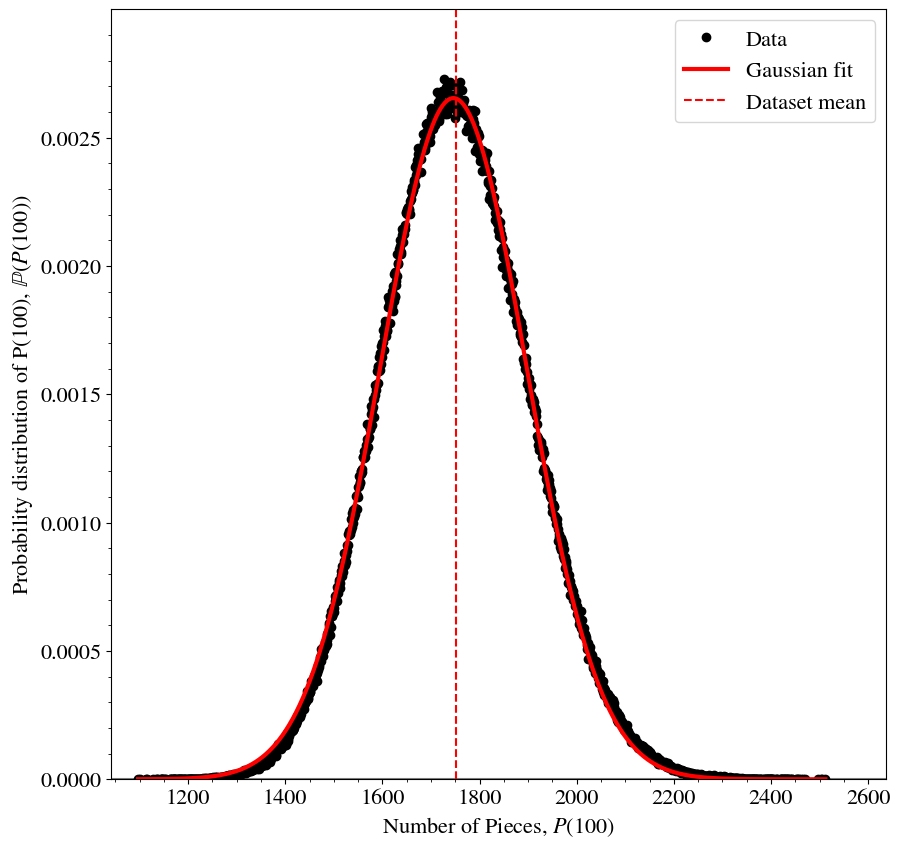

In [37]:
def count_pieces(num_cuts):
    cake_pieces = [list(sort([rand.uniform(0, 2 * pi), rand.uniform(0, 2 * pi)])) for i in range(num_cuts)]
    total_intersections = 0 
    for i in range(num_cuts):
        for j in range(num_cuts - i):
            if (cake_pieces[j][0] < cake_pieces[0][0] < cake_pieces[j][1]) ^ (cake_pieces[j][0] < cake_pieces[0][1] < cake_pieces[j][1]): # XOR conditions
                total_intersections += 1
        cake_pieces.pop(0)
    return total_intersections + num_cuts + 1


def gauss(num_pieces, mu, sigma): # Gaussian model
    return (1 / (sigma * sqrt(2 * pi))) * exp(- 0.5 * ((num_pieces - mu) / sigma) ** 2)


def main(num_cuts, num_loops):
    simulation = [count_pieces(num_cuts) for i in range(num_loops)]
    
    sim_mean = average(simulation)
    sim_stdev = std(simulation)
    frequency = collections.Counter(simulation)
    frequency = dict(sorted(frequency.items()))
    piece_range = array(list(frequency.keys()))
    probability = array(list(frequency.values())) / num_loops
    
    popt, pcov = curve_fit(gauss, piece_range, probability, p0=[sim_mean, sim_stdev])
    perr = sqrt(diag(pcov)) 
    print(f"BEST MODEL:\nMean is {popt[0]} ± {perr[0]}, Standard deviation is {popt[1]} ± {perr[1]}\n")
    
    plt.figure(figsize=(10, 10), dpi=100)
    plt.axvline(color='gray')
    plt.axhline(color='gray')
    plt.minorticks_on()
    plt.xlabel(fr'Number of Pieces, $P({num_cuts})$')
    plt.ylabel(str(fr'Probability distribution of P({num_cuts}), '+ r'$\mathbb{P}(P($'+ f'{num_cuts}'+ '))'))
    plt.xlim(0.95 * min(piece_range), 1.05 * max(piece_range))
    plt.ylim(0, 1.1 * max(probability))
    plt.plot(piece_range, probability, 'ko', label='Data')
    plt.plot(piece_range, gauss(piece_range, *popt), 'r-', linewidth=3, label='Gaussian fit')
    plt.axvline(sim_mean, color='r', linestyle='--', label='Dataset mean')
    plt.legend()
    #plt.savefig(f"gaussian_model.png", bbox_inches='tight', dpi=300)
    
    print(f"DATASET:\nLeast pieces encountered: {min(piece_range)}, theoretical minimum: {num_cuts + 1}")
    print(f"Most pieces encountered: {max(piece_range)}, theoretical maximum: {(1 / 2) * (num_cuts * num_cuts + num_cuts + 2)}")
    print(f"Average number of pieces: {sim_mean}, theoretical mean: {int((1 / 6) * num_cuts * num_cuts + (5 / 6) * num_cuts + 1)}")
    print(f"Standard deviation: {sim_stdev}, theoretical st. dev.: {sqrt( sum(power(simulation - sim_mean, 2) / (len(simulation) - 1)))}\n")
    print(f"Mode: {st.mode(simulation)}, Median: {median(simulation)}, Mean: {sim_mean}")
    return [piece_range, probability]


start = time.time()

piece_range, probability = main(num_cuts = 100, num_loops = int(2e6)) # Change parameters here

end = time.time()
print(f"\nRun time: {end - start} sec")